### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [17]:
#Análisis de facturación de las 4 tiendas

print("\n1. FACTURACIÓN TOTAL POR TIENDA\n")
facturacion1 = tienda1['Precio'].sum()
facturacion2 = tienda2['Precio'].sum()
facturacion3 = tienda3['Precio'].sum()
facturacion4 = tienda4['Precio'].sum()

#Imprimimos el resultado

print(f"Tienda 1: ${facturacion1:,.0f}")
print(f"Tienda 2: ${facturacion2:,.0f}")
print(f"Tienda 3: ${facturacion3:,.0f}")
print(f"Tienda 4: ${facturacion4:,.0f}")



1. FACTURACIÓN TOTAL POR TIENDA

Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


/tmp/ipython-input-2908355551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tienda', y='Precio', data=ingresos_por_tienda, palette='crest')


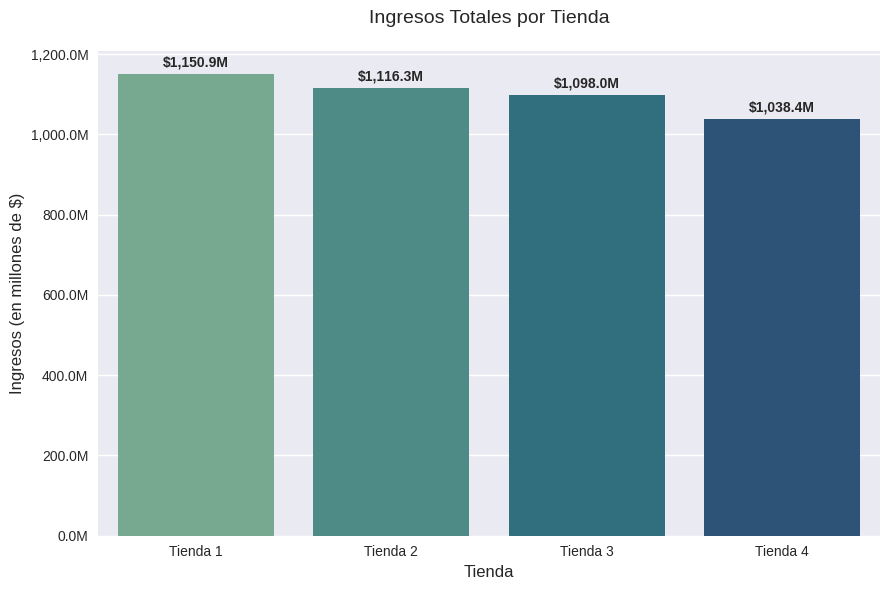

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficamos
plt.figure(figsize=(9,6))
ax = sns.barplot(x='Tienda', y='Precio', data=ingresos_por_tienda, palette='crest')

# Convertir a millones para etiquetas
ingresos_millones = ingresos_por_tienda['Precio'] / 1_000_000

# Agregar valores encima de las barras
for i, valor in enumerate(ingresos_millones):
    ax.text(i, ingresos_por_tienda['Precio'].iloc[i] + ingresos_por_tienda['Precio'].max()*0.01,
            f'${valor:,.1f}M', ha='center', va='bottom', fontweight='bold')

plt.title('Ingresos Totales por Tienda', fontsize=14, pad=20)
plt.ylabel('Ingresos (en millones de $)', fontsize=12)
plt.xlabel('Tienda', fontsize=12)

# Quitar notación científica y formatear
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:,.1f}M'))

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [24]:
# Ingresos totales por categoría
ventas_categoria = datos.groupby('Categoría del Producto')['Precio'].sum().reset_index()

# Ordenamos de mayor a menor
ventas_categoria = ventas_categoria.sort_values(by='Precio', ascending=False)

ventas_categoria


,Categoría del Producto,Precio
3,Electrónicos,1.660576e+09
2,Electrodomésticos,1.324751e+09
7,Muebles,7.576610e+08
4,Instrumentos musicales,3.487726e+08
1,Deportes y diversión,1.429777e+08
5,Juguetes,7.360440e+07
0,Artículos para el hogar,5.757980e+07
6,Libros,3.769610e+07


In [25]:
# Combinamos todas las tiendas con una columna 'Tienda'
datos_tiendas = pd.concat([
    tienda1.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
])

# Agrupamos: ingresos por Tienda y Categoría
ventas_categoria = (datos_tiendas
                    .groupby(['Tienda', 'Categoría del Producto'])['Precio']
                    .sum()
                    .reset_index()
                    .sort_values(['Tienda', 'Precio'], ascending=[True, False]))

# Convertimos a millones para el gráfico
ventas_categoria['Precio_Millones'] = ventas_categoria['Precio'] / 1_000_000

/tmp/ipython-input-2660360318.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.head(5))


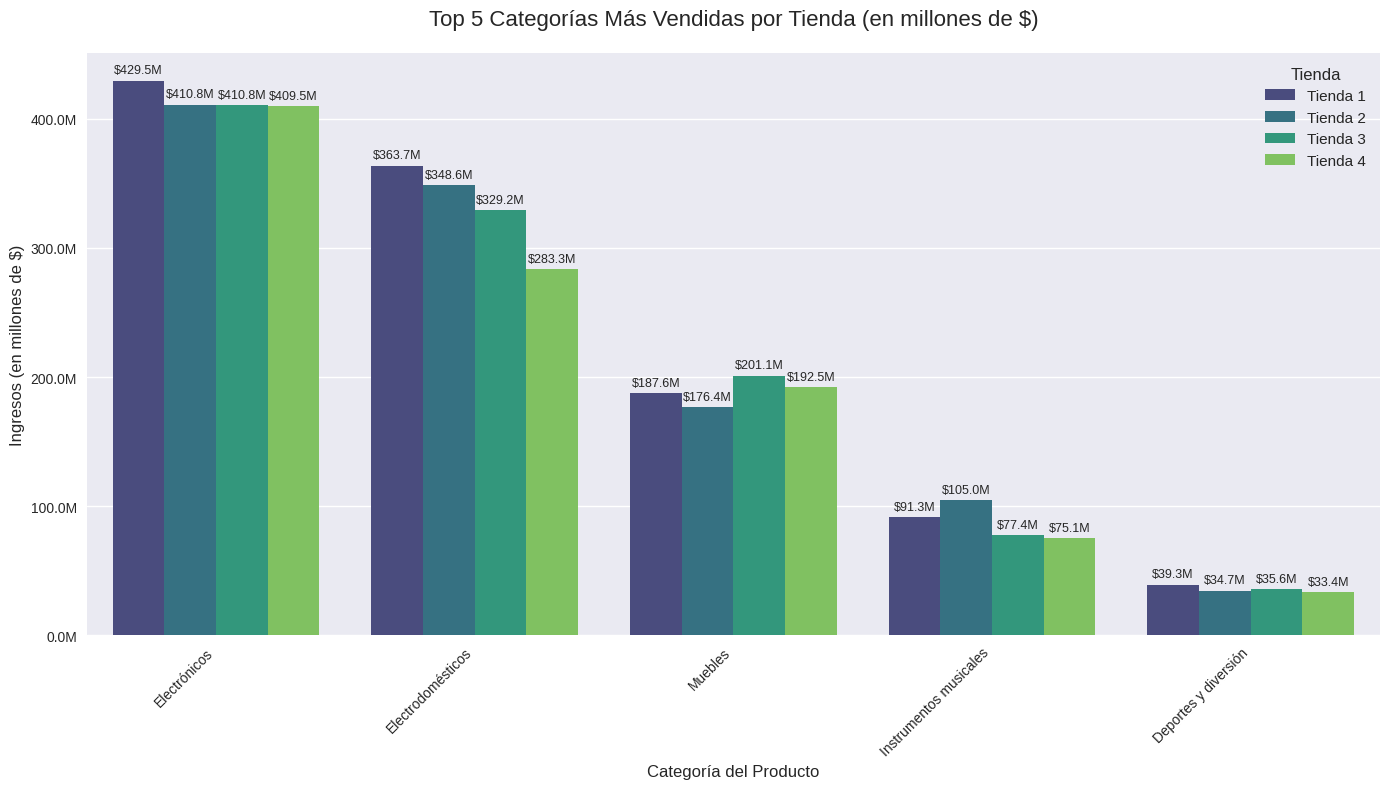

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Tomamos solo las TOP 5 categorías por tienda (para no saturar)
top_categorias_por_tienda = (ventas_categoria
                             .groupby('Tienda')
                             .apply(lambda x: x.head(5))
                             .reset_index(drop=True))

# Gráfico
ax = sns.barplot(
    data=top_categorias_por_tienda,
    x='Categoría del Producto',
    y='Precio_Millones',
    hue='Tienda',
    palette='viridis'
)

plt.title('Top 5 Categorías Más Vendidas por Tienda (en millones de $)', fontsize=16, pad=20)
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Ingresos (en millones de $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda', title_fontsize=12, fontsize=11)

# Formato del eje Y: sin notación científica, con "M"
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}M'))

# Agregar valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='$%.1fM', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda